# Keras
## Sequential API

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [2]:
X_train, X_val, y_train, y_val = X_train[:55000], X_train[55000:], y_train[:55000], y_train[55000:]

X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

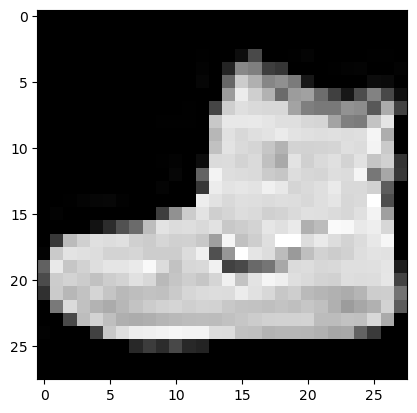

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [4]:
tf.random.set_seed(20)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.8217 - val_loss: 0.3936 - val_accuracy: 0.8502
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3700 - accuracy: 0.8650 - val_loss: 0.3668 - val_accuracy: 0.8622
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.8763 - val_loss: 0.3630 - val_accuracy: 0.8692
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8859 - val_loss: 0.3485 - val_accuracy: 0.8718
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3422 - val_accuracy: 0.8776
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.8952 - val_loss: 0.3533 - val_accuracy: 0.8712
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.8999 - val_loss: 0.3282 - val_accuracy:

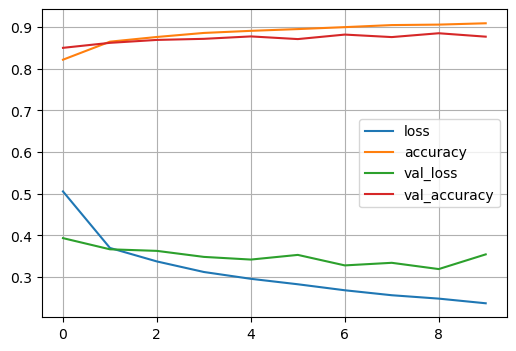

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.show()

In [9]:
results = model.evaluate(X_test, y_test)
print(r'Loss: {:.2f}, Accuracy: {:.2f}'.format(results[0], results[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8730
Loss: 0.36, Accuracy: 0.87


In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

print(y_pred[0])

9


## Sequential API for Regression

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cali_housing = fetch_california_housing()

X, y = cali_housing.data, cali_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_val.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [2]:
def create_model():
    tf.random.set_seed(20)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model

### Define the model via Subcalssing API

In [ ]:
# class RegressModel(tf.keras.Model):
#     def __init__(self):
#         super().__init__()
#         self.dense1 = tf.keras.layers.Dense(64, activation='relu')
#         self.dense2 = tf.keras.layers.Dense(32, activation='relu')
#         self.dense3 = tf.keras.layers.Dense(32, activation='relu')
#         self.dense4 = tf.keras.layers.Dense(1)

#     def call(self, inputs, training=False):
#         x = self.dense1(inputs)
#         x = self.dense2(x)
#         x = self.dense3(x)
#         return self.dense4(x)

In [3]:
model = create_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
413/413 [==============================] - 2s 2ms/step - loss: 0.9942 - mae: 0.6694 - val_loss: 0.3993 - val_mae: 0.4571
Epoch 2/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3996 - mae: 0.4533 - val_loss: 0.3523 - val_mae: 0.4330
Epoch 3/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3701 - mae: 0.4338 - val_loss: 0.3555 - val_mae: 0.4429
Epoch 4/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3531 - mae: 0.4211 - val_loss: 0.3223 - val_mae: 0.4001
Epoch 5/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3416 - mae: 0.4138 - val_loss: 0.3217 - val_mae: 0.4082
Epoch 6/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3303 - mae: 0.4041 - val_loss: 0.3030 - val_mae: 0.3947
Epoch 7/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3236 - mae: 0.3990 - val_loss: 0.2949 - val_mae: 0.3805
Epoch 8/10
413/413 [==============================] - 1s 1ms/step - loss: 0.

In [5]:
mse, mae = model.evaluate(X_test, y_test)
print(r'Test MSE: {:.2f}, Test MAE: {:.2f}'.format(mse, mae))

129/129 [==============================] - 0s 1ms/step - loss: 0.3132 - mae: 0.3802
Test MSE: 0.31, Test MAE: 0.38


In [6]:
y_pred = model.predict(X_test)
print(y_pred[:5].ravel())
print(y_test[:5])

[1.4889662 2.443582  1.473622  2.1863635 2.2531116]
[1.176 2.922 1.313 2.659 2.102]


### Callbacks

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = create_model()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

checkpoint = ModelCheckpoint('model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[checkpoint, early_stopping])

# manually save the model after training
# model.save('model.h5')

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.9942 - mae: 0.6694 - val_loss: 0.3991 - val_mae: 0.4571

Epoch 00001: val_loss improved from inf to 0.39912, saving model to model.h5
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3997 - mae: 0.4534 - val_loss: 0.3523 - val_mae: 0.4326

Epoch 00002: val_loss improved from 0.39912 to 0.35225, saving model to model.h5
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3696 - mae: 0.4338 - val_loss: 0.3557 - val_mae: 0.4437

Epoch 00003: val_loss did not improve from 0.35225
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3516 - mae: 0.4207 - val_loss: 0.3220 - val_mae: 0.4001

Epoch 00004: val_loss improved from 0.35225 to 0.32197, saving model to model.h5
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3410 - mae: 0.4135 - val_loss: 0.3223 - val_mae: 0.4096

Epoch 00005: val_loss did not improve from 0.

In [8]:
model = tf.keras.models.load_model('model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [9]:
mse, mae = model.evaluate(X_test, y_test)
print(r'Test MSE: {:.2f}, Test MAE: {:.2f}'.format(mse, mae))

129/129 [==============================] - 0s 1ms/step - loss: 0.3059 - mae: 0.3806
Test MSE: 0.31, Test MAE: 0.38


In [10]:
model.save_weights('model_weights.h5')

In [11]:
model.load_weights('model_weights.h5')

In [12]:
y_pred = model.predict(X_test)
print(y_pred[:5].ravel())
print(y_test[:5])

[1.369338  2.586187  1.5943354 2.1087496 2.2451963]
[1.176 2.922 1.313 2.659 2.102]


### Vanishing/Exploding Gradients

In [ ]:
# LeakyReLU with He initialization

model = tf.keras.models.Sequential([
    # ...
    tf.keras.layers.Dense(32, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(),
    # ...
    ])

In [ ]:
# adding batch normalization before activation function in hidden layer

model = tf.keras.models.Sequential([
    # ...
    model.add(tf.keras.layers.Dense(64, activation='relu')),
    tf.keras.layers.BatchNormalization(),
    # ...
])

In [ ]:
# Gradient Clipping can be used to prevent exploding gradients in RNNs

optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

### Overfitting

In [ ]:
# L1 and L2 regularization
# L1 regularization results in sparse models, where some feature weights are zero
# L2 regularization results in more balanced models

model = tf.keras.models.Sequential([
    # ...
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # ...
])

In [ ]:
# Dropout randomly sets a fraction of input units to 0 at each update during training

model = tf.keras.models.Sequential([
    # ...
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    # ...
])

### Learning Rate Decay

$$
lr_t = lr_{start} * decay^{(\frac{t}{decay\_steps})}
$$

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.1,
    decay_steps=100000,
    decay_rate=0.8,
    staircase=False)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

## ConvNet

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from functools import partial

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0

tf.random.set_seed(20)

Conv2D = partial(layers.Conv2D, kernel_size=(3, 3), activation='relu')
MaxPooling2D = partial(layers.MaxPooling2D, pool_size=(2, 2))
Dropout = partial(layers.Dropout, rate=0.25)

model = tf.keras.models.Sequential([
    Conv2D(filters=32, input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Dropout(),
    Conv2D(filters=64),
    MaxPooling2D(),
    Dropout(),
    Conv2D(filters=64),
    Dropout(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/20
1500/1500 [==============================] - 6s 2ms/step - loss: 0.7979 - accuracy: 0.7040 - val_loss: 0.4679 - val_accuracy: 0.8227
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5243 - accuracy: 0.8097 - val_loss: 0.3780 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8378 - val_loss: 0.3388 - val_accuracy: 0.8759
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4116 - accuracy: 0.8532 - val_loss: 0.3275 - val_accuracy: 0.8772
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3854 - accuracy: 0.8626 - val_loss: 0.2914 - val_accuracy: 0.8917
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8677 - val_loss: 0.3000 - val_accuracy: 0.8835
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3588 - accuracy: 0.8715 - val_loss: 0.2899 - val_accuracy:

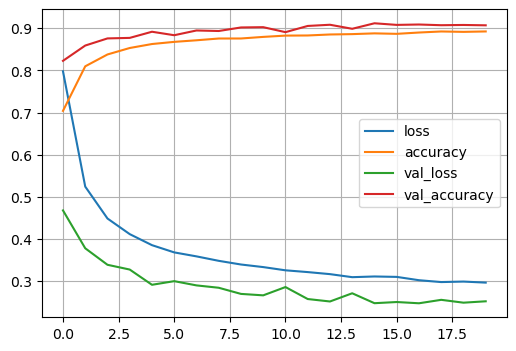

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.show()

### Data Augmentation

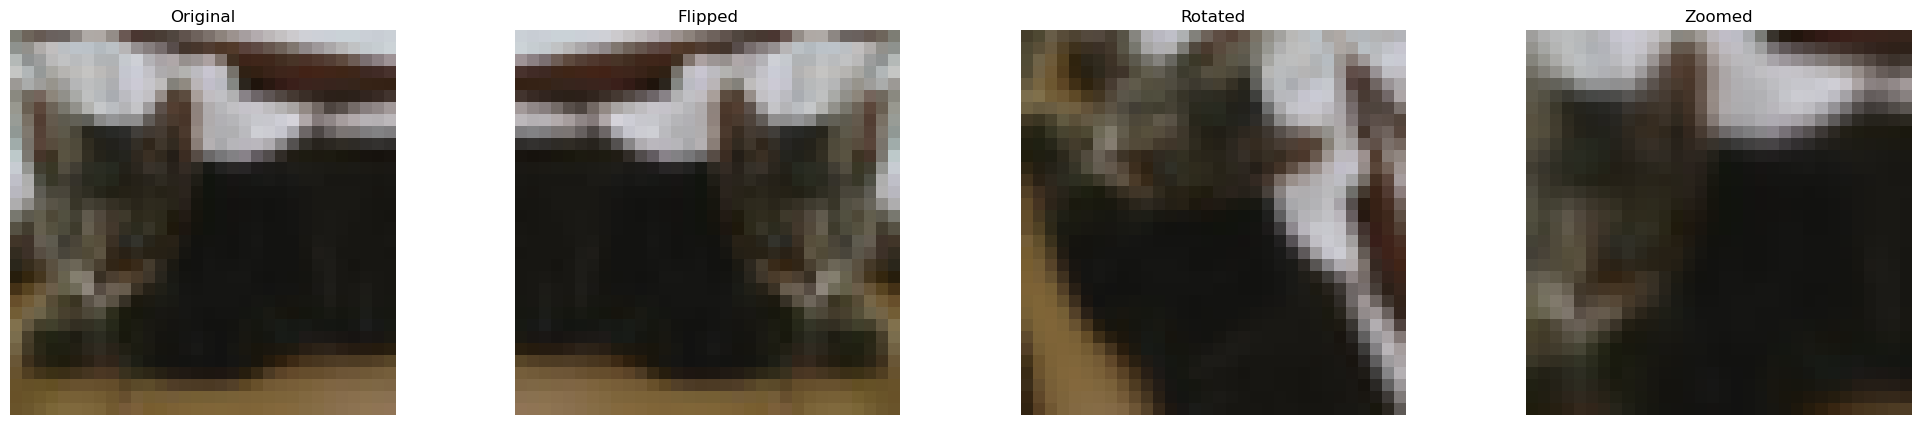

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
train_images, test_images = X_train / 255.0, X_test / 255.0
img = train_images[9]
img = np.expand_dims(img, axis=0)


aug1 = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
])

aug2 = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
])

aug3 = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.4),
])

augmented_image1 = aug1(img)
augmented_image2 = aug2(img)
augmented_image3 = aug3(img)

fig, axes = plt.subplots(1, 4, figsize=(25, 5))

axes[0].imshow(img[0])
axes[0].set_title('Original')

axes[1].imshow(augmented_image1[0])
axes[1].set_title('Flipped')

axes[2].imshow(augmented_image2[0])
axes[2].set_title('Rotated')

axes[3].imshow(augmented_image3[0])
axes[3].set_title('Zoomed')

for ax in axes:
    ax.axis('off')

plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

model = tf.keras.models.Sequential([
    data_augmentation,
    Conv2D(filters=32, input_shape=(28, 28, 1)),
    # ...
])

## Pretrained Models

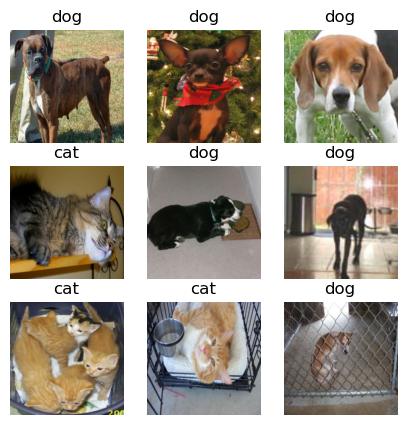

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

(train, validation, test), info = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], with_info=True, as_supervised=True)

# ResNet50 image size 224x224
SIZE = 224
def resize_norm(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (SIZE, SIZE))
    return image, label

train = train.map(resize_norm)
validation = validation.map(resize_norm)
test = test.map(resize_norm)

images, labels = next(iter(train.batch(9)))

class_names = ['cat', 'dog']
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow((images[i].numpy() + 1) / 2)
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.show()

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D


# ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

# freeze the layers of the base model to prevent changing its weights
for layer in base_model.layers:
    layer.trainable = False

# create a new model
model = Sequential()

# base model
model.add(base_model)

# custom layers
# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
history = model.fit(train.batch(32), epochs=10, validation_data=validation.batch(32))

Epoch 1/10
582/582 [==============================] - 52s 80ms/step - loss: 0.6233 - accuracy: 0.6514 - val_loss: 0.6509 - val_accuracy: 0.5847
Epoch 2/10
582/582 [==============================] - 45s 77ms/step - loss: 0.5762 - accuracy: 0.6941 - val_loss: 0.6386 - val_accuracy: 0.6040
Epoch 3/10
582/582 [==============================] - 45s 77ms/step - loss: 0.5574 - accuracy: 0.7106 - val_loss: 0.6103 - val_accuracy: 0.6432
Epoch 4/10
582/582 [==============================] - 45s 77ms/step - loss: 0.5442 - accuracy: 0.7220 - val_loss: 0.6104 - val_accuracy: 0.6462
Epoch 5/10
582/582 [==============================] - 45s 77ms/step - loss: 0.5346 - accuracy: 0.7286 - val_loss: 0.6113 - val_accuracy: 0.6470
Epoch 6/10
582/582 [==============================] - 45s 78ms/step - loss: 0.5266 - accuracy: 0.7335 - val_loss: 0.5981 - val_accuracy: 0.6625
Epoch 7/10
582/582 [==============================] - 45s 78ms/step - loss: 0.5188 - accuracy: 0.7391 - val_loss: 0.6276 - val_accuracy:

In [4]:
loss, accuracy = model.evaluate(test.batch(32))

print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy:.2f}')

73/73 [==============================] - 5s 69ms/step - loss: 0.6096 - accuracy: 0.6470
Test loss: 0.61
Test accuracy: 0.65


## RNNs

### Sentiment Analysis

In [1]:
import tensorflow_datasets as tfds

(train, validation, test), info = tfds.load(name="imdb_reviews", split=["train[:85%]", "train[85%:]", "test"], with_info=True, as_supervised=True)

In [2]:
for text, label in train.take(5):
    print('Text: ', text.numpy())
    print('Label: ', label.numpy())

Text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label:  0
Text:  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. 

In [3]:
import tensorflow as tf
from keras.layers import TextVectorization, Embedding, LSTM, Dropout, Dense

import tensorflow_datasets as tfds

(train, validation, test), info = tfds.load(name="imdb_reviews", split=["train[:85%]", "train[85%:]", "test"], with_info=True, as_supervised=True)

vocab_size = 2000
sequence_length = 200

# TextVectorization layer: convert text features to sequence of integers
# only considers the top 2000 most frequent words
# set fixed sequence length to 200
text_vec = TextVectorization(max_tokens=vocab_size, output_sequence_length=sequence_length)
text_vec.adapt(train.map(lambda text, label: text))


batch_temp = next(iter(train.batch(5)))
sequences = text_vec(batch_temp[0])
seq = sequences[0]
print(len(seq.numpy()))
print(seq.numpy())


200
[  11   14   34  406  381   18   90   27    1    8   33 1326    1   41
  496    1  192   25   85  152   19   11  218  315   27   65  241  216
    8  485   54   65   85  115   95   22    1   11   93  633  726   11
   18    7   34  401    1  171    1  410    2   88 1204  137   68  144
   52    2    1    1   68  244   65    1   16    1    1    1    1 1439
    1    3   40    1 1643   17    1   14  159   19    4 1204  858    1
    8    4   18   12   14    1    5   99  146 1231   10  234  690   12
   48   25   93   39   11    1  152   39 1326    1   50  408   10   95
 1155  850  140    9    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [4]:
tf.random.set_seed(20)

model = tf.keras.Sequential([
    text_vec,
    Embedding(input_dim=vocab_size, output_dim=128, mask_zero=True),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [5]:
history = model.fit(train.batch(64), validation_data=validation.batch(64), epochs=10)

Epoch 1/10
333/333 [==============================] - 18s 35ms/step - loss: 0.5679 - accuracy: 0.6964 - val_loss: 0.5929 - val_accuracy: 0.6779
Epoch 2/10
333/333 [==============================] - 11s 32ms/step - loss: 0.5326 - accuracy: 0.7352 - val_loss: 0.4538 - val_accuracy: 0.8091
Epoch 3/10
333/333 [==============================] - 10s 31ms/step - loss: 0.4464 - accuracy: 0.8036 - val_loss: 0.4469 - val_accuracy: 0.7997
Epoch 4/10
333/333 [==============================] - 10s 31ms/step - loss: 0.3698 - accuracy: 0.8485 - val_loss: 0.3807 - val_accuracy: 0.8363
Epoch 5/10
333/333 [==============================] - 10s 32ms/step - loss: 0.3324 - accuracy: 0.8665 - val_loss: 0.3701 - val_accuracy: 0.8421
Epoch 6/10
333/333 [==============================] - 10s 31ms/step - loss: 0.3152 - accuracy: 0.8749 - val_loss: 0.3896 - val_accuracy: 0.8293
Epoch 7/10
333/333 [==============================] - 10s 31ms/step - loss: 0.3054 - accuracy: 0.8797 - val_loss: 0.4385 - val_accuracy:

In [6]:
test_loss, test_acc = model.evaluate(test.batch(64))
print('Test accuracy:', test_acc)

391/391 [==============================] - 6s 14ms/step - loss: 0.4033 - accuracy: 0.8356
Test accuracy: 0.835640013217926
